# Partial Trace, Entanglement Entropy, and Interaction Graphs

## Partial Trace

In [1]:
import numpy as np
import networkx as nx

import numpy as np

def partial_trace(rho_AB, qubits_A, qubits_B):
    """
    Compute the partial trace of a pure state rho_AB with respect to subsystem B,
    given the qubits corresponding to subsystem A and subsystem B.
    
    Args:
    rho_AB (ndarray): A pure state of the system, represented as a 2^n x 2^m matrix,
                      where n is the number of qubits in subsystem A and m is the number
                      of qubits in subsystem B.
    qubits_A (list[int]): A list of integers representing the qubits corresponding to subsystem A.
    qubits_B (list[int]): A list of integers representing the qubits corresponding to subsystem B.
    
    Returns:
    rho_A (ndarray): The reduced density matrix representing the state of subsystem A alone,
                     represented as a 2^n x 2^n matrix.
    """
    # Compute the dimensions of the subsystems
    dim_A = 2**len(qubits_A)
    dim_B = 2**len(qubits_B)

    # Reshape the state into a tensor product of A and B subsystems
    rho_AB = np.reshape(rho_AB, (dim_A, dim_B, dim_A, dim_B))

    # Compute the partial trace by summing over subsystem B
    rho_A = np.trace(rho_AB, axis1=1, axis2=3)

    return rho_A


## von Neumann Entanglement Entropy

The definition of von Neumann entanglement entropy is 

In [2]:
def entropy(rho, base=2):
    """
    Computes the von Neumann entropy of a density matrix.

    Args:
        rho: The density matrix.
        base: The logarithmic base of the entropy.

    Returns:
        The von Neumann entropy of the density matrix.
    """
    eigvals = np.linalg.eigvalsh(rho)
    eigvals = eigvals[np.nonzero(eigvals)]
    return -np.sum(eigvals * np.log(eigvals)) / np.log(base)


In [3]:
import cirq

# Define a 3-qubit circuit
circuit = cirq.Circuit()
q0, q1, q2 = cirq.LineQubit.range(3)

# Apply Hadamard gates to each qubit
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)])

# Apply CNOT gates to create a GHZ state
circuit.append([cirq.CNOT(q0, q1), cirq.CNOT(q1, q2)])

circuit

0: ───H───@───────
          │
1: ───H───X───@───
              │
2: ───H───────X───

In [4]:
rho = cirq.final_density_matrix(circuit)
rho

array([[0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j],
       [0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j,
        0.12499998+0.j, 0.12499998+0.j, 0.12499998+0.j, 0.

In [5]:
import numpy as np
from qiskit.quantum_info import partial_trace, entropy
from qiskit import QuantumCircuit, Aer, execute


def compute_entanglement_entropies(rho):
    """
    Computes the von Neumann entanglement entropy for every pair of qubits in the input density matrix.

    Args:
        rho (numpy.ndarray): a 2^n x 2^n density matrix representing the state of n qubits.

    Returns:
        numpy.ndarray: an n x n matrix of von Neumann entanglement entropies, where element i,j gives the entropy
        of the reduced density matrix of qubits i and j.
    """
    # Determine the number of qubits n from the shape of rho.
    n = int(np.log2(rho.shape[0]))

    # Create an empty n x n matrix to store the entropies.
    entanglement_entropies = np.zeros((n, n))

    # Loop over all pairs of qubits (i, j).
    for i in range(n):
        for j in range(i+1, n):

            # Define the indices of the qubits to trace out.
            trace_indices = [k for k in range(n) if k != i and k != j]

            # Trace out the other qubits to obtain the reduced density matrix.
            rho_ij = partial_trace(rho, trace_indices)

            # Compute the von Neumann entropy of the reduced density matrix.
            entanglement_entropies[i,j] = entropy(rho_ij)

    # Copy the upper triangular part of the matrix to the lower triangular part.
    entanglement_entropies += entanglement_entropies.T - np.diag(entanglement_entropies.diagonal())

    return entanglement_entropies


In [6]:
compute_entanglement_entropies(rho)

array([[0.00000000e+00, 2.57973954e-07, 2.57973954e-07],
       [2.57973954e-07, 0.00000000e+00, 2.57973954e-07],
       [2.57973954e-07, 2.57973954e-07, 0.00000000e+00]])

In [7]:
import cirq

# Define a 3-qubit circuit
circuit2 = cirq.Circuit()
q0, q1, q2, q3 = cirq.LineQubit.range(4)

# Apply Hadamard gates to each qubit
circuit2.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)])

# Apply CNOT gates to create a GHZ state
circuit2.append([cirq.CNOT(q0, q1), cirq.CNOT(q1, q2), cirq.CNOT(q2, q3)])

circuit2

0: ───H───@───────────
          │
1: ───H───X───@───────
              │
2: ───H───────X───@───
                  │
3: ───────────────X───

In [8]:
rho2 = cirq.final_density_matrix(circuit2)
compute_entanglement_entropies(rho2)

array([[0.00000000e+00, 2.57973953e-07, 1.00000008e+00, 1.00000008e+00],
       [2.57973953e-07, 0.00000000e+00, 1.00000008e+00, 1.00000008e+00],
       [1.00000008e+00, 1.00000008e+00, 0.00000000e+00, 2.57973954e-07],
       [1.00000008e+00, 1.00000008e+00, 2.57973954e-07, 0.00000000e+00]])

## Weighted Interaction Graphs

Now we can write a Python function to plot the weighted interaction graph corresponding to the pairwise entanglement entropies of qubits as weights. 

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_weighted_graph(weighted_adj_matrix):
    """
    Creates a labeled weighted graph using NetworkX and plots the graph with labels.

    Args:
        weighted_adj_matrix: A weighted adjacency matrix.

    Returns:
        Nothing.
    """
    n_nodes = len(weighted_adj_matrix)
    G = nx.Graph()
    for i in range(n_nodes):
        G.add_node(i)
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            weight = weighted_adj_matrix[i, j]
            G.add_edge(i, j, weight=weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()


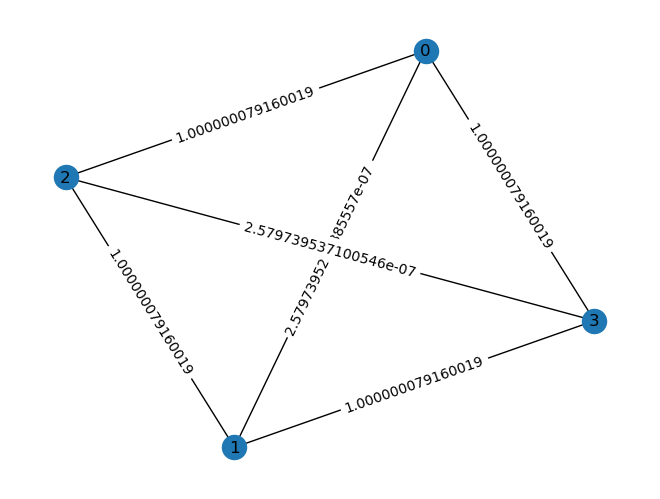

In [10]:
entropies = compute_entanglement_entropies(rho2)
plot_weighted_graph(entropies)

## Persistent Homology of Weighted Interaction Graphs

We will use the [Topological feature extraction from graphs](https://github.com/giotto-ai/giotto-tda/blob/master/examples/persistent_homology_graphs.ipynb) notebook to understand the persistent homology of weighted interaction graphs. We also are working on code to use quantum mutual information instead of entanglement entropy as weights. 